## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Loading Data

In [2]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

## Plotting

In [3]:
def plot_accuracy( accuracies ):
    plt.plot(accuracies)
    plt.title("Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("% correct guess")
    plt.show()
    
def plot_loss( loss ):
    plt.plot(loss)
    plt.title("Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Cost function (soft max)")
    plt.show()

## Gradient Descent

In [4]:
class GD(object):
    def __init__( self, labels, features, delta, step_size, iterations=1000 ):
        self.labels = labels
        self.features = features
        self.delta = delta
        self.step_size = step_size
        self.W = np.random.rand( 10,10 )
        self.loss = []
        self.iterations = iterations
        self.accuracies = []
        
    def score_function( self, W, features ):
        """updates the scores matrix"""
        return features.dot( W )
    
    def loss_function( self, scores ):
        """updates the loss value"""
        all_loss_values = - np.log10( np.divide( np.exp( scores - np.max( scores, axis=0 ) ),np.sum( np.exp( scores - np.max( scores, axis=0 ) ), axis=0 )))
        Li = all_loss_values[range( len( self.labels ) ), np.array( self.labels ).T].T #do indexing magic here
        return np.mean(Li)
    
    def get_accuracy( self ):
        """return accuracy of current iteration"""
        scores = self.score_function(self.W, self.features)
        probs = np.exp( scores - np.max( scores, axis=0 ) )/np.sum( np.exp( scores - np.max( scores, axis=0 ) ), axis=0)
        guesses = np.argmax( probs, axis=1 )
        correct = 0
        for i, guess in enumerate( guesses ):
            if guess == self.labels[i]:
                correct += 1
        return correct / float( len( guesses ) )
        
    
    def numerical_gradient( self ):
        """calculate and return the gradient and the loss of the current iteration"""
        original_loss = self.loss_function( self.score_function( self.W, self.features ) )
        grad = np.zeros( [10,10] )
        new_w = self.W.copy()
        for i in range( len( self.W ) ):
            for j in range( len( self.W ) ):
                new_w[i][j] += self.delta
                li = self.loss_function( self.score_function( new_w, self.features ) )
                new_w[i][j] -= self.delta
                val = ( li - original_loss )/self.delta
                grad[i][j] = val
        return grad, original_loss
        
    def run(self):
        """update weights using gradient descent"""
        NUM_EPOCHS = self.iterations
        for _ in tqdm( range( 0,NUM_EPOCHS ) ):
            grad, loss = self.numerical_gradient()
            self.W = self.W - self.step_size * grad
            self.loss.append(loss)
            self.accuracies.append(self.get_accuracy())
        

100%|██████████| 1000/1000 [00:59<00:00, 16.84it/s]


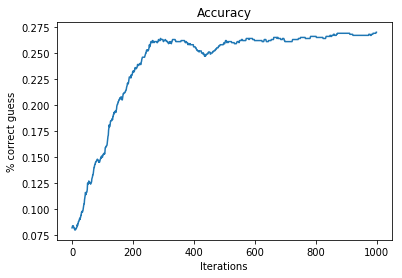

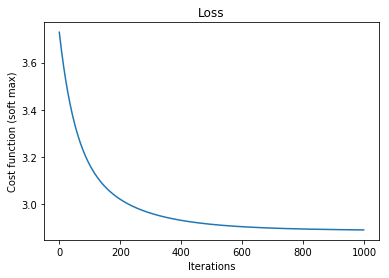

In [5]:
gradient_object = GD( labels, features, 0.000001, 0.1 )
gradient_object.run()
plot_accuracy( gradient_object.accuracies )
plot_loss( gradient_object.loss )